In [1]:
!pip install matplotlib_venn
!pip install wordcloud

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from matplotlib_venn import venn3
from wordcloud import WordCloud, STOPWORDS

url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/11_SevCatOneNumNestedOneObsPerGroup.csv'
data = pd.read_csv(url, sep=';')
print(data.shape)
print(data.columns)

(250, 4)
Index(['region', 'subregion', 'key', 'value'], dtype='object')


In [6]:
data.head()

,region,subregion,key,value
0,Asia,Southern Asia,Afghanistan,25500100
1,Europe,Northern Europe,Åland Islands,28502
2,Europe,Southern Europe,Albania,2821977
3,Africa,Northern Africa,Algeria,37900000
4,Oceania,Polynesia,American Samoa,55519


# Treemap

In [7]:
!pip install squarify

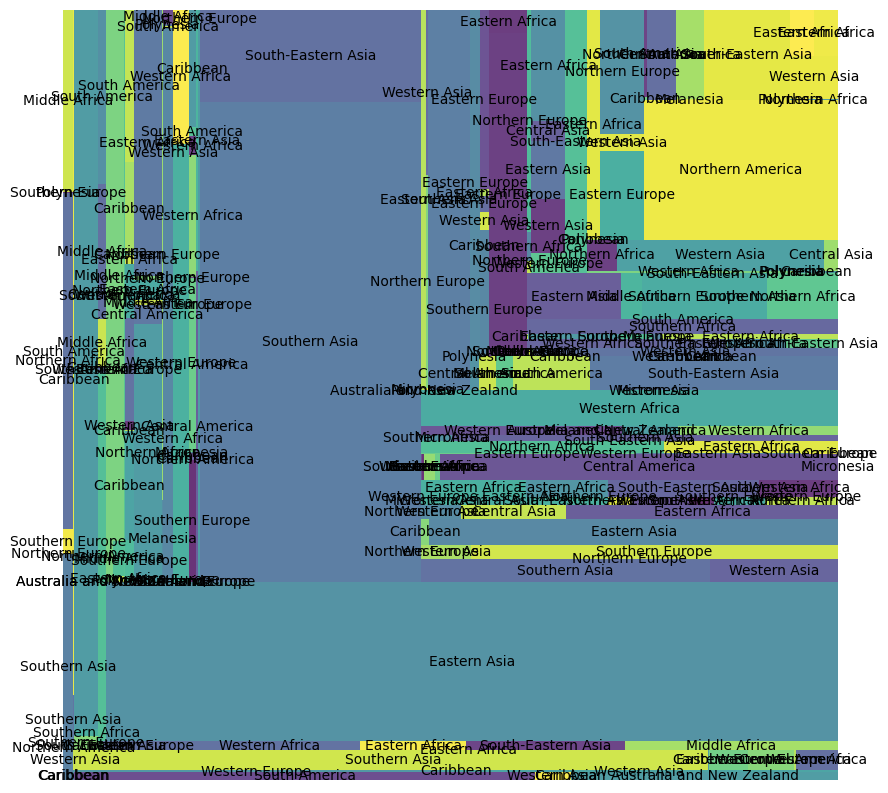

In [8]:
import seaborn as sns
import squarify 
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
data.dropna(inplace=True)
# squarify.plot(sizes=data['value'],label=data['region'], alpha=.8 )
squarify.plot(sizes=data['value'],label=data['subregion'], alpha=.8 )
plt.axis('off')
plt.show()

# Circle packing

In [9]:
!pip install circlify
import circlify

In [13]:
circles = circlify.circlify(
    np.max([data['value'].tolist(), (data['value']*0).tolist()], axis=0), 
    show_enclosure=True, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(10,10))

ax.axis('off')

lim = 1
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = data['subregion'][::-1].tolist()

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=10))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Lollipop Chart

In [38]:
from collections import defaultdict
freq = defaultdict(int)
for word in data['word']:
    freq[word] += 1
unique_words, freqs = list(freq.keys()), list(freq.values())
sorter = sorted(list(zip(freqs, unique_words)))
unique_words, freqs = [si[1] for si in sorter][::-1], [si[0] for si in sorter][::-1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


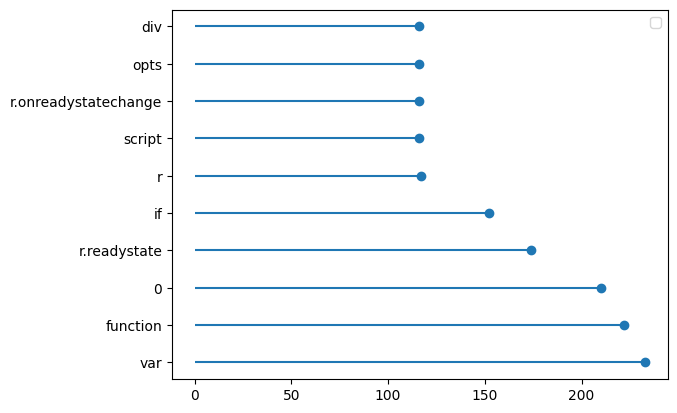

In [43]:
plt.hlines(y = unique_words[:10], xmin=0, xmax=freqs[:10])
plt.plot(freqs[:10], range(10), "o")
plt.legend()
plt.show()

# Venn diagram

In [54]:
np.unique(data['artist'])

array(['booba', 'georges-brassens', 'nekfeu'], dtype=object)

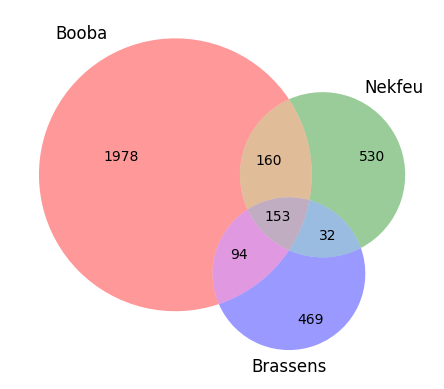

In [55]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set([row for row in data[data['artist']=="booba"]['word']] )
set2 = set([row for row in data[data['artist']=="nekfeu"]['word']] )
set3 = set([row for row in data[data['artist']=="georges-brassens"]['word']] )

venn3([set1, set2, set3], ('Booba', 'Nekfeu', 'Brassens'))
plt.show()